In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import sympy as sym
sym.init_printing(use_latex='mathjax')

# Interpolación Numérica

La **interpolación numérica** es una técnica matemática utilizada para estimar valores intermedios entre puntos conocidos de una función o conjunto de datos. La idea principal es construir una función (o polinomio) a partir de los datos dados que se aproxime a la función original que los creó, la interpolación también se usa para la aproximación de una función complicada por una más simple de calcular, así ahorrando tiempo de computación.

## Métodos de Interpolación

Existen varios métodos de interpolación, entre los que destacan:

1. **Interpolación Lineal**:
   - Se utiliza para aproximar valores entre dos puntos conocidos.
2. **Interpolación Polinómica**:
   - Se basa en la construcción de un polinomio que pase por todos los puntos dados.
   - El método más común es el de Lagrange, que utiliza polinomios de Lagrange para interpolar.
   - Otro método es el de Newton, que utiliza diferencias divididas.

3. **Splines Cúbicos**:
   - Divide el dominio en segmentos y ajusta polinomios cúbicos a cada segmento.
   - Garantiza continuidad y suavidad en la interpolación.



# Teorema de aproximación de Weierstrass
 Suponga que $f(x)$ es definida y continua en $[a,b]$, entonces, para cada $\varepsilon > 0$
 existe un Polinomio $P(x)$ con la propiedad que,

 $$|f (x) − P(x)| < \varepsilon,$$    
        
para todo $x$ en $[a,b]$. En otras palabras, este teorema garantiza que se puede remplazar la función original por un polinomio; el cuál es más simple de calcular.

# Interpolación Lineal

La **interpolación lineal** es un método matemático utilizado para estimar valores desconocidos que se encuentran entre dos puntos conocidos en una función o conjunto de datos. Es una técnica fundamental en diversas áreas como la ingeniería, las ciencias físicas, la economía y la informática.

## Fórmula de la Interpolación Lineal

La fórmula de la interpolación lineal entre dos puntos $ (x_0, y_0) $ y $ (x_1, y_1) $ para encontrar un valor $ y $ correspondiente a un valor $ x $ dado es:

$$
y = y_0 + \frac{(y_1 - y_0)}{(x_1 - x_0)} \times (x - x_0)
$$

Donde:
- $ x $ es el valor para el cual se desea encontrar $ y $.
- $ (x_0, y_0) $ y $ (x_1, y_1) $ son los puntos conocidos.


La interpolación lineal es esencial por varias razones:

- **Simplicidad**: Es fácil de entender e implementar, lo que la hace accesible para una amplia gama de aplicaciones.
- **Eficiencia Computacional**: Requiere pocos cálculos, lo que es beneficioso para aplicaciones en tiempo real.
- **Versatilidad**: Se puede aplicar en múltiples disciplinas, desde gráficos por computadora hasta análisis de datos.
- **Base para Métodos Más Complejos**: Sirve como fundamento para técnicas de interpolación más avanzadas, como la interpolación polinómica y spline.

## Ejemplo de Implementación

Supongamos que tenemos dos puntos conocidos:
- Punto A: $ (2, 4) $
- Punto B: $ (5, 10) $

Queremos encontrar el valor de $ y $ cuando $ x = 3 $.

Aplicando la fórmula de interpolación lineal:

$$
y = 4 + \frac{(10 - 4)}{(5 - 2)} \times (3 - 2) = 4 + \frac{6}{3} \times 1 = 4 + 2 = 6
$$

Por lo tanto, cuando $ x = 3 $, $ y = 6 $.




In [2]:
def interpolacion_lineal(x0, y0, x1, y1, x):
    """
    Calcula el valor interpolado de y para un valor dado de x utilizando interpolación lineal.

    Parámetros:
    x0 (float): Coordenada x del primer punto.
    y0 (float): Coordenada y del primer punto.
    x1 (float): Coordenada x del segundo punto.
    y1 (float): Coordenada y del segundo punto.
    x (float): Valor de x para el cual se desea interpolar y.

    Retorna:
    float: Valor interpolado de y.
    """
    if x1 == x0:
        raise ValueError("x0 y x1 no pueden ser iguales.")

    y = y0 + ((y1 - y0) / (x1 - x0)) * (x - x0)
    return y

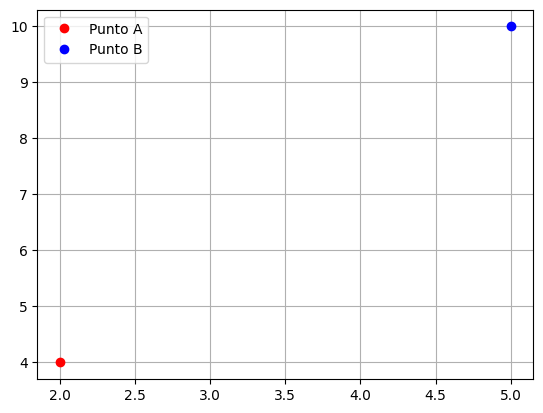

In [3]:
punto_A = np.array([2, 4])
punto_B = np.array([5, 10])

plt.plot(punto_A[0], punto_A[1], 'ro', label='Punto A')
plt.plot(punto_B[0], punto_B[1], 'bo', label='Punto B')
plt.legend()
plt.grid()
plt.show()

In [4]:
x = 3
y = interpolacion_lineal(punto_A[0], punto_A[1], punto_B[0], punto_B[1], x)
print(f"El valor interpolado de y para x = {x} es: {y}")

El valor interpolado de y para x = 3 es: 6.0


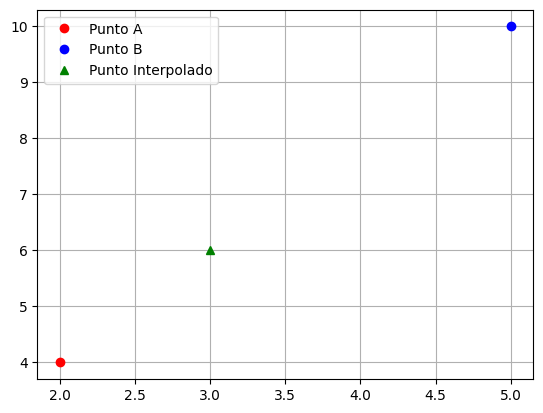

In [5]:
plt.plot(punto_A[0], punto_A[1], 'ro', label='Punto A')
plt.plot(punto_B[0], punto_B[1], 'bo', label='Punto B')
plt.plot(x, y, 'g^', label='Punto Interpolado')
plt.legend()
plt.grid()
plt.show()

la interpolación lineal es la más simple de todas las técnicas de interpolación y consiste entonces en aproximar la función $y=f(x)$ con una linea recta cada par de puntos consecutivos $P=(x_i,y_i)$ y $P'=(x_{i+1},y_{i+1})$ es decir,

$$y = y_i+\frac{y_{i+1}-y_i}{x_{i+1}-x_i}(x-x_i).$$

Note que esta ecuación se obtiene de observar que la pendiente de la recta es constante entre los puntos $P$ y $P'$, es decir, $m=\frac{y-y_i}{x-x_i}=\frac{y_{i+1}-y_i}{x_{i+1}-x_i}$. El problema es que la función no es suave y su derivada a cada punto $(x_i,y_i)$ no existe.

In [6]:
def Interpolacion_lineal(xi, yi, n):
    ''' Interpolación lineal, esta función toma 2 arrays.
        y devuelve los arrays de valores x e y interpolados.'''

    # Calcular el número total de puntos interpolados
    total_puntos = (len(xi) - 1) * n + 1  # Incluyendo el último punto

    # Inicializar los arrays de salida
    x_interpolados = np.zeros(total_puntos)
    y_interpolados = np.zeros(total_puntos)

    index = 0  # Índice para los arrays de salida

    for i in range(len(xi) - 1):
        # Dividimos el intervalo i,i+1 en n pedazos
        x = np.linspace(xi[i], xi[i + 1], n, endpoint=False)  # No usar el último punto

        # Función que hace interpolación lineal en i,i+1
        f = lambda x: yi[i] + (yi[i + 1] - yi[i]) / (xi[i + 1] - xi[i]) * (x - xi[i])

        # Calcular los valores interpolados y almacenarlos
        y = np.array([f(xk) for xk in x])  # xk son los valores de x en i,i+1

        # Guardar los valores interpolados en el array
        x_interpolados[index:index + n] = x
        y_interpolados[index:index + n] = y
        index += n

    # Guardar el último punto
    x_interpolados[-1] = xi[-1]
    y_interpolados[-1] = yi[-1]

    return x_interpolados, y_interpolados



In [7]:
xi = np.linspace(-np.pi,np.pi,10)
yi = np.sin(xi)

x_interpolados, y_interpolados = Interpolacion_lineal(xi,yi,10)

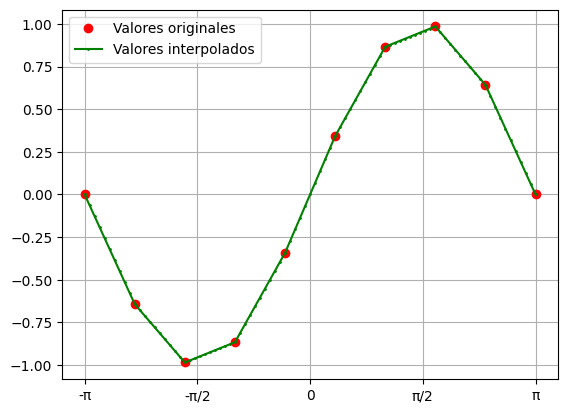

In [8]:
plt.plot(xi, yi, 'ro', label = 'Valores originales')
plt.plot(x_interpolados, y_interpolados, 'g.-', ms = 2, label = 'Valores interpolados')
plt.legend()
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           ['-π', '-π/2', '0', 'π/2', 'π'])
plt.grid()
plt.show()

# Interpolación de Polinómica

La **interpolación de Lagrange** es un método de interpolación polinómica que permite construir un polinomio que pasa por un conjunto dado de puntos.

## Ecuaciones

Para un conjunto de $n+1$ puntos $(x_0, y_0)$, $(x_1, y_1)$, ..., $(x_n, y_n)$, el polinomio de Lagrange se define como:

$$ L(x) = \sum_{i=0}^n y_i \cdot l_i(x) $$

donde $l_i(x)$ es el polinomio base de Lagrange:

$$ l_i(x) = \prod_{j=0, j \neq i}^n \frac{x - x_j}{x_i - x_j} $$

## Importancia

1. **Precisión**: Pasa exactamente por todos los puntos dados.
2. **Flexibilidad**: Puede usarse con puntos no equidistantes.
3. **Base teórica**: Fundamental en el estudio de la interpolación polinómica.
4. **Aplicaciones**: Útil en aproximación de funciones, análisis numérico y procesamiento de señales.


Para mayor claridad, la fórmula completa del polinomio de Lagrange puede expresarse como:

$$ L(x) = \sum_{i=0}^n y_i \cdot \prod_{j=0, j \neq i}^n \frac{x - x_j}{x_i - x_j} $$

Esta fórmula muestra explícitamente cómo cada término del polinomio se construye a partir de los puntos dados.

Consideremos los siguientes puntos:

- $(1, 1)$
- $(2, 4)$
- $(3, 9)$

## Polinomio de Lagrange

El polinomio de Lagrange $P(x)$ se define como:

$$
P(x) = \sum_{i=0}^{n} y_i L_i(x)
$$

donde los polinomios de Lagrange $L_i(x)$ se definen como:

$$
L_i(x) = \prod_{\substack{j=0 \\ j \neq i}}^{n} \frac{x - x_j}{x_i - x_j}
$$

### Cálculo de los Términos de Lagrange

1. **Para $L_0(x)$**:

   $$
   L_0(x) = \frac{(x - 2)(x - 3)}{(1 - 2)(1 - 3)} = \frac{(x - 2)(x - 3)}{(-1)(-2)} = \frac{(x - 2)(x - 3)}{2}
   $$

2. **Para $L_1(x)$**:

   $$
   L_1(x) = \frac{(x - 1)(x - 3)}{(2 - 1)(2 - 3)} = \frac{(x - 1)(x - 3)}{(1)(-1)} = -(x - 1)(x - 3)
   $$

3. **Para $L_2(x)$**:

   $$
   L_2(x) = \frac{(x - 1)(x - 2)}{(3 - 1)(3 - 2)} = \frac{(x - 1)(x - 2)}{(2)(1)} = \frac{(x - 1)(x - 2)}{2}
   $$

### Expresión del Polinomio $P(x)$

Ahora, usando los $y_i$:

$$
P(x) = 1 \cdot L_0(x) + 4 \cdot L_1(x) + 9 \cdot L_2(x)
$$

Sustituyendo $L_0(x)$, $L_1(x)$ y $L_2(x)$:

$$
P(x) = 1 \cdot \left(\frac{(x - 2)(x - 3)}{2}\right) + 4 \cdot \left(-(x - 1)(x - 3)\right) + 9 \cdot \left(\frac{(x - 1)(x - 2)}{2}\right)
$$

### Simplificación

1. **Para $1 \cdot L_0(x)$**:
   $$
   = \frac{(x - 2)(x - 3)}{2} = \frac{x^2 - 5x + 6}{2}
   $$

2. **Para $4 \cdot L_1(x)$**:
   $$
   = 4 \cdot (-(x - 1)(x - 3)) = -4(x - 1)(x - 3) = -4(x^2 - 4x + 3) = -4x^2 + 16x - 12
   $$

3. **Para $9 \cdot L_2(x)$**:
   $$
   = 9 \cdot \left(\frac{(x - 1)(x - 2)}{2}\right) = \frac{9}{2}(x^2 - 3x + 2) = \frac{9}{2}x^2 - \frac{27}{2}x + 9
   $$

### Combinando Términos

Ahora, combinamos todos los términos:

$$
P(x) = \frac{1}{2}(x^2 - 5x + 6) - 4x^2 + 16x - 12 + \left(\frac{9}{2}x^2 - \frac{27}{2}x + 9\right)
$$

Agrupando los términos de $x^2$ y $x$:

1. **Términos de $x^2$**:
   $$
   P(x) = \left(\frac{1}{2} - 4 + \frac{9}{2}\right)x^2
   $$
   $$
   = \left(\frac{1 + 9 - 8}{2}\right)x^2 = \frac{2}{2}x^2 = x^2
   $$

2. **Términos de $x$**:
   $$
   P(x) = \left(-\frac{5}{2} + 16 - \frac{27}{2}\right)x
   $$
   $$
   = \left(-\frac{5 + 27 - 32}{2}\right)x = \frac{32 - 5 - 27}{2}x = \frac{0}{2}x = 0
   $$

3. **Términos constantes**:
   $$
   P(x) = \frac{6}{2} - 12 + 9 = 3 - 12 + 9 = 0
   $$

### Polinomio Final

Así, el polinomio interpolador simplificado es:

$$
P(x) = x^2
$$

### Verificación

Ahora, verifiquemos que el polinomio $P(x) = x^2$ cumple con los puntos:

- Para $x = 1$: $P(1) = 1^2 = 1$
- Para $x = 2$: $P(2) = 2^2 = 4$
- Para $x = 3$: $P(3) = 3^2 = 9$
- Para $x = 2.5$: $P(2.5) = (2.5)^2 = 6.25$

Esto confirma que el polinomio de Lagrange que interpola los puntos dados es efectivamente $P(x) = x^2$.


In [9]:
# Definir variables
x = sym.symbols('x')

# Puntos dados (x_i, y_i)
puntos = [(1, 1), (2, 4), (3, 9), (4,16)]  # Ejemplo de puntos

# Extraer las coordenadas x e y
x_vals = [p[0] for p in puntos]
y_vals = [p[1] for p in puntos]

# Inicializar una lista para los polinomios de Lagrange
polinomios_lagrange = []

# Generar los polinomios de Lagrange L_i(x)
for i in range(len(puntos)):
    L_i = 1
    for j in range(len(puntos)):
        if i != j:
            L_i *= (x - x_vals[j]) / (x_vals[i] - x_vals[j])

    polinomios_lagrange.append(L_i)

# Mostrar cada polinomio de Lagrange
for i in range(len(puntos)):
  print(f'L_{i}(x)')
  display(sym.expand(polinomios_lagrange[i]))
  print(5*'----')

polinomio_final = sum(L_i * y_vals[i] for i, L_i in enumerate(polinomios_lagrange))
sym.simplify(polinomio_final)


# Convertir en funciones

L_0 = sym.lambdify(x, polinomios_lagrange[0]*y_vals[0])
L_1 = sym.lambdify(x, polinomios_lagrange[1]*y_vals[1])
L_2 = sym.lambdify(x, polinomios_lagrange[2]*y_vals[2])
L_3 = sym.lambdify(x, polinomios_lagrange[3]*y_vals[3])
P = sym.lambdify(x, polinomio_final)
P(2.5)

L_0(x)


   3      2           
  x    3⋅x    13⋅x    
- ── + ──── - ──── + 4
  6     2      3      

--------------------
L_1(x)


 3                  
x       2   19⋅x    
── - 4⋅x  + ──── - 6
2            2      

--------------------
L_2(x)


   3      2          
  x    7⋅x           
- ── + ──── - 7⋅x + 4
  2     2            

--------------------
L_3(x)


 3                
x     2   11⋅x    
── - x  + ──── - 1
6          6      

--------------------


6.25

Veamos los diferentes polinomios
---



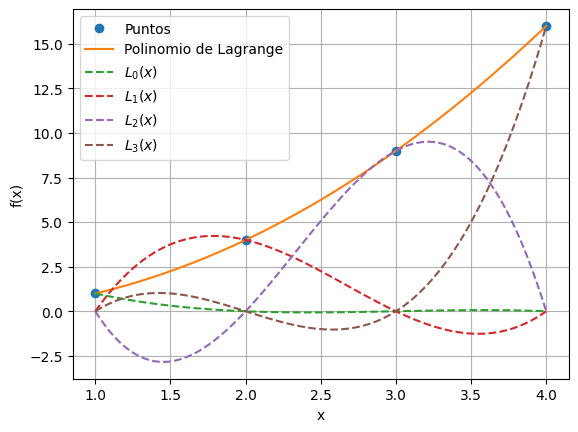

In [10]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])


x_vals = np.linspace(min(x_vals), max(x_vals), 100)


plt.plot(x, y, 'o', label='Puntos')
plt.plot(x_vals, P(x_vals), '-', label='Polinomio de Lagrange')
plt.plot(x_vals, L_0(x_vals), '--', label='$L_0(x)$')
plt.plot(x_vals, L_1(x_vals), '--', label='$L_1(x)$')
plt.plot(x_vals, L_2(x_vals), '--', label='$L_2(x)$')
plt.plot(x_vals, L_3(x_vals), '--', label='$L_3(x)$')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()


In [11]:
def Lagrange_Polinomio(x, y):
    """
    Genera el polinomio de Lagrange completo como una función que puede evaluarse en múltiples x.

    :param x: array de puntos x
    :param y: array de puntos y correspondientes
    :return: una función que representa el polinomio de Lagrange
    """
    n = len(x)

    def P(t):
        """ Calcula el polinomio interpolante total en t """
        Pol = 0
        for k in range(n):
            def L(k, t):
                """ Calcula el k-ésimo polinomio base de Lagrange en t """
                lag = 1
                for i in range(n):
                    if i != k:
                        lag *= (t - x[i]) / (x[k] - x[i])
                return lag

            Pol += y[k] * L(k, t)

        return Pol

    return P


In [12]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 4, 9, 16])
poly = Lagrange_Polinomio(x, y)

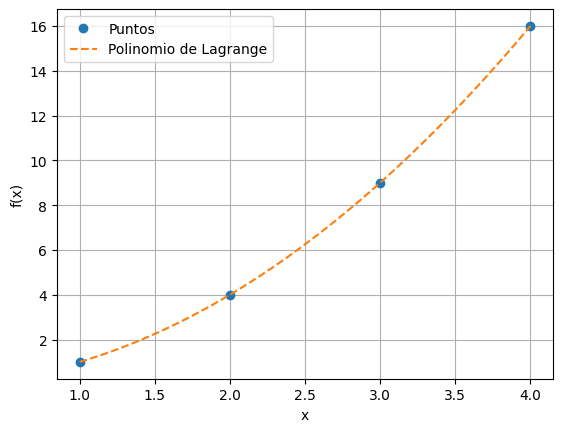

In [13]:
x_interp = np.linspace(min(x), max(x), 100)
y_interp = poly(x_interp)

plt.plot(x, y, 'o', label='Puntos')
plt.plot(x_interp, y_interp, '--', label='Polinomio de Lagrange')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()

## Ejemplo

Sea la función $f(x) = \frac{1}{x}$ encontremos el polinomio de Lagrange que pasa por los puntos $x_i = [0.15, 0.2, 0.3, 0.5, 0.8, 1.0, 1.4, 1.7]$

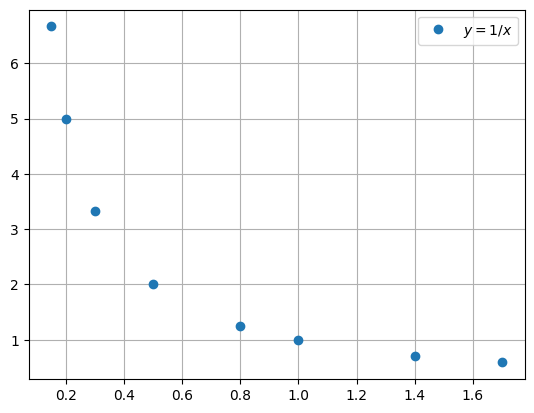

In [14]:
x = np.array([0.15, 0.2, 0.3, 0.5, 0.8, 1.0, 1.4, 1.7])
f = lambda x: 1/x
y = f(x)
plt.plot(x, y, 'o', label = '$y=1/x$')
plt.legend()
plt.grid()
plt.show()


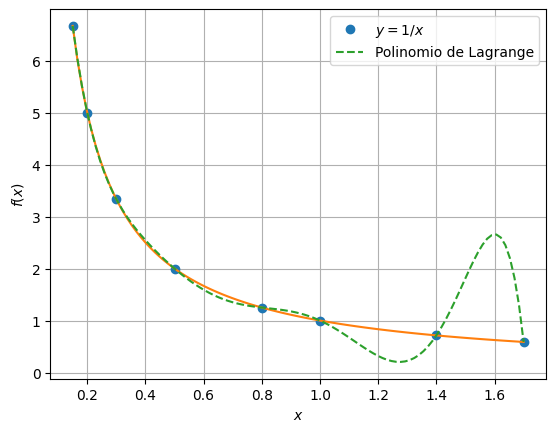

In [15]:
poly = Lagrange_Polinomio(x, y)
x_interp= np.linspace(min(x), max(x), 100)
y_interp = poly(x_interp)
plt.plot(x, y, 'o', label = '$y=1/x$')
plt.plot(x_interp, f(x_interp), '-')
plt.plot(x_interp, y_interp, '--', label = 'Polinomio de Lagrange')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid()
plt.show()

### Método
Estas fluctuaciones al incrementar el orden del polinomio tienen base en conceptos que veremos un poco más adelante. Ahora veamos como usar `scipy.interpolate` para encontrar $P_n(x)$

In [16]:
from scipy.interpolate import lagrange
x = np.array([1, 2, 3])
y = np.array([1, 4, 9])

P = lagrange(x, y)

Pol =  np.poly1d(P)

print(Pol)

   2
1 x


# Error en la Interpolación de Lagrange

La interpolación de Lagrange construye un polinomio de grado $n-1$ que pasa exactamente por $n$ puntos dados. Sin embargo, este polinomio interpolante puede no aproximar bien los valores entre los puntos si la función subyacente no es un polinomio o tiene alta curvatura.

El error en la interpolación de Lagrange está dado por la siguiente fórmula:

$$
R_n(x) = f(x) - P_n(x)
$$

Donde:
- $R_n(x)$ es el error de interpolación.
- $f(x)$ es la función original que estamos tratando de aproximar.
- $P_n(x)$ es el polinomio de interpolación de Lagrange de grado $n-1$.

### Fórmula del Error

El error de interpolación de Lagrange puede expresarse explícitamente como:

$$
R_n(x) = \frac{f^{(n)}(\xi)}{\left(n+1\right)!} \prod_{i=0}^{n} (x - x_i)
$$

Donde:
- $f^{(n)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.


### Implicaciones

- **Tamaño del error**: El término

  $$
  \prod_{i=0}^{n-1} (x - x_i)
  $$

  crece cuando $x$ está lejos de los nodos $x_i$, lo que puede aumentar el error.
  
- **Distribución de puntos**: Si los puntos $x_i$ están distribuidos de manera irregular o están muy separados, el error puede aumentar considerablemente.
  
- **Oscilaciones**: Para funciones suaves, el polinomio de interpolación de Lagrange puede aproximar bien la función dentro del intervalo de los nodos, pero puede oscilar fuera de estos puntos, lo que se conoce como el **fenómeno de Runge**.


### Ejemplo

Supongamos que queremos interpolar la función $f(x) = \sin(x)$ en los puntos $x_0 = 0$, $x_1 = \frac{\pi}{2}$, y $x_2 = \pi$. El error en un punto $x$ sería:

$$
R_3(x) = \frac{f^{(3)}(\xi)}{3!} (x - x_0)(x - x_1)(x - x_2)
$$

Dado que la tercera derivada de $\sin(x)$ es $-\sin(x)$, tenemos:

$$
R_3(x) = \frac{-\sin(\xi)}{6} (x - 0)(x - \frac{\pi}{2})(x - \pi)
$$

Este error será pequeño si $x$ está cerca de los puntos de interpolación, pero puede aumentar significativamente fuera de este rango.

### Actividad
> Utilizando el ejemplo anterior, encuentre el polinomio de orden $n$ para la interpolación de los datos y luego escriba la función de error asociada.


## Condición de Runge

La condición de Runge, también conocida como [fenómeno de Runge](https://es.wikipedia.org/wiki/Fen%C3%B3meno_de_Runge), es un problema que ocurre en la interpolación polinómica cuando se usan polinomios de alto grado para interpolar funciones en intervalos cerrados usando puntos equidistantes. En esencia, la condición de Runge muestra que para ciertas funciones, aumentar el grado del polinomio interpolador no siempre mejora la aproximación, y de hecho puede empeorarla significativamente, especialmente cerca de los extremos del intervalo.

Cuando los puntos de interpolación no están uniformemente distribuidos, los polinomios de Lagrange pueden exhibir fluctuaciones significativas por las siguientes razones:

1. **Sensibilidad a la distribución de puntos:**
   Los polinomios de Lagrange son muy sensibles a la ubicación de los puntos de interpolación. Una distribución no uniforme puede resultar en intervalos de tamaños muy dispares.

2. **Oscilaciones en los extremos:**
   Las fluctuaciones son especialmente pronunciadas cerca de los extremos del intervalo de interpolación.

3. **Grado del polinomio:**
   Un mayor número de puntos de interpolación resulta en un polinomio de mayor grado, lo cual tiende a aumentar las oscilaciones.

4. **Error de redondeo:**
   La distribución no uniforme puede exacerbar los errores de redondeo en los cálculos.



# Método de Interpolación de Newton

Es una técnica para encontrar un polinomio que pase por un conjunto de puntos dados. A diferencia del polinomio de Lagrange, el método de Newton utiliza **diferencias divididas** y ofrece una forma más eficiente de actualizar el polinomio si se agregan nuevos puntos de interpolación. El polinomio resultante se expresa como una combinación lineal de productos incrementales.

## Polinomio de Newton

Para un conjunto de puntos $(x_0, y_0), (x_1, y_1), ..., (x_n, y_n)$, el polinomio de interpolación de Newton de grado $n$ tiene la forma:

$$
P(x) = a_0 + a_1(x - x_0) + a_2(x - x_0)(x - x_1) + \dots + a_n(x - x_0)(x - x_1)\dots(x - x_{n-1})
$$

Donde los coeficientes $a_i$ se calculan utilizando diferencias divididas, que se definen recursivamente.

## Diferencias Divididas

La interpolación de Newton se basa en las **diferencias divididas**, que se calculan de manera recursiva. Estas tiene la siguiente forma:

#### Primera diferencia dividida:
$$
f[x_i, x_{i+1}] = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i}
$$

#### Segunda diferencia dividida:
$$
f[x_i, x_{i+1}, x_{i+2}] = \frac{f[x_{i+1}, x_{i+2}] - f[x_i, x_{i+1}]}{x_{i+2} - x_i}
$$

#### Diferencias divididas de orden superior:
$$
f[x_0, x_1, \dots, x_n] = \frac{f[x_1, x_2, \dots, x_n] - f[x_0, x_1, \dots, x_{n-1}]}{x_n - x_0}
$$

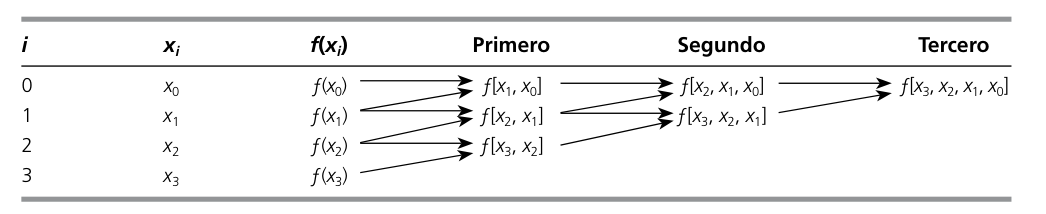

### Ejemplo de cálculo de diferencias divididas

Si tenemos los puntos $(x_0, y_0), (x_1, y_1), (x_2, y_2)$, los coeficientes $a_0$, $a_1$, y $a_2$ son:

1. $a_0 = f[x_0] = y_0$
2. $a_1 = f[x_0, x_1] = \frac{y_1 - y_0}{x_1 - x_0}$
3. $a_2 = f[x_0, x_1, x_2] = \frac{f[x_1, x_2] - f[x_0, x_1]}{x_2 - x_0}$

#### Ventajas del Método de Newton

- **Fácil actualización**: Si se añade un nuevo punto de interpolación, no es necesario recalcular todo el polinomio desde cero, ya que los coeficientes anteriores permanecen iguales.
- **Estabilidad numérica**: Al calcular el polinomio paso a paso, se reduce la posibilidad de errores numéricos en algunos casos.

#### Ejemplo

Supongamos que tenemos los puntos $(1, 1)$, $(2, 4)$, $(3, 9)$ correspondientes a $f(x) = x^2$. Para encontrar el polinomio interpolante:

1. $a_0 = 1$
2. $a_1 = \frac{4 - 1}{2 - 1} = 3$
3. $a_2 = \frac{\frac{9 - 4}{3 - 2} - \frac{4 - 1}{2 - 1}}{3 - 1} = 1$

El polinomio de interpolación es:

$$
P(x) = 1 + 3(x - 1) + 1(x - 1)(x - 2)
$$

Al simplificar:

$$
P(x) = x^2
$$

Este es el mismo polinomio que $f(x) = x^2$, ya que los puntos dados provienen de esa función.



In [17]:
def diferencias_divididas(x, y):
    """
    Calcula la tabla de diferencias divididas.

    Parámetros:
    x: array de puntos x
    y: array de valores f(x)

    Retorna:
    coef: array de coeficientes para el polinomio de Newton
    """
    n = len(x)
    coef = y
    tabla = np.zeros((n, n))
    tabla[:,0] = y

    for j in range(1, n):
        for i in range(n-j):
            tabla[i,j] = (tabla[i+1,j-1] - tabla[i,j-1]) / (x[i+j] - x[i])

    # Los coeficientes son la primera fila de la tabla
    coef = tabla[0,:]
    return tabla, coef


## Forma general del polinomio de Newton

Para un conjunto de puntos $(x_0, x_1, \dots, x_n)$, el polinomio de interpolación de Newton es:

$$
P(x) = \sum_{i=0}^{n} f[x_0, x_1, \dots, x_i] \prod_{j=0}^{i-1} (x - x_j)
$$

Donde:
- $f[x_0, x_1, \dots, x_i]$ es la $i$-ésima diferencia dividida.
- $\prod_{j=0}^{i-1} (x - x_j)$ es el producto de los términos $(x - x_j)$ para $j = 0, 1, \dots, i-1$.


In [18]:
def polinomio_newton(x_data, coef, x_eval):
    """
    Evalúa el polinomio de interpolación de Newton.

    Parámetros:
    x_data: puntos x usados para construir el polinomio
    coef: coeficientes calculados por diferencias_divididas()
    x_eval: punto donde evaluar el polinomio

    Retorna:
    y: valor del polinomio evaluado en x_eval
    """
    n = len(x_data)
    p = coef[0]
    for i in range(1, n):
        termino = coef[i]
        for j in range(i):
            termino *= (x_eval - x_data[j])
        p += termino
    return p

In [19]:
# Ejemplo de uso:
x_points = np.array([1, 2, 3])
y_points = np.array([1, 4, 9])  # f(x) = x^2

# Calcular la tabla de diferencias divididas
tabla_dd, coef_dd = diferencias_divididas(x_points, y_points)

print("Tabla de Diferencias Divididas:")
print(tabla_dd)

print("\nCoeficientes del Polinomio de Newton:")
print(coef_dd)

Tabla de Diferencias Divididas:
[[1. 3. 1.]
 [4. 5. 0.]
 [9. 0. 0.]]

Coeficientes del Polinomio de Newton:
[1. 3. 1.]


In [20]:
poli_newton = polinomio_newton(x_points, coef_dd, 2.5)
print(poli_newton)

6.25


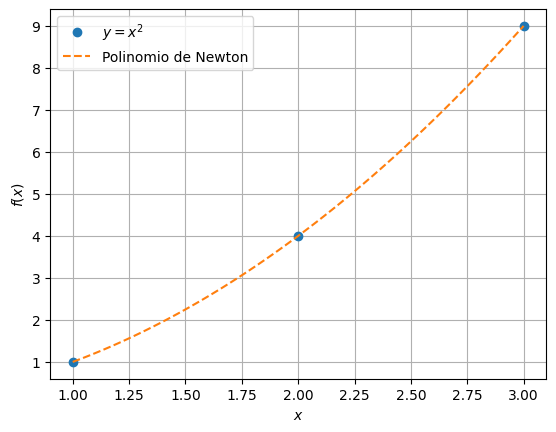

In [21]:
x_interp = np.linspace(min(x_points), max(x_points), 100)
y_interp = [polinomio_newton(x_points, coef_dd, xi) for xi in x_interp]
plt.plot(x_points, y_points, 'o', label = '$y=x^2$')
plt.plot(x_interp, y_interp, '--', label = 'Polinomio de Newton')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid()
plt.show()

# Método polinomio de Newton

Aunque no hay una función específica llamada "polinomio de Newton" en la biblioteca de `scipy`,  podemos usar la clase `BarycentricInterpolator` para obtener un polinomio interpolador de Newton de manera indirecta, ya que este método utiliza la idea de las diferencias divididas.


```python
from scipy.interpolate import CubicHermiteSpline
```


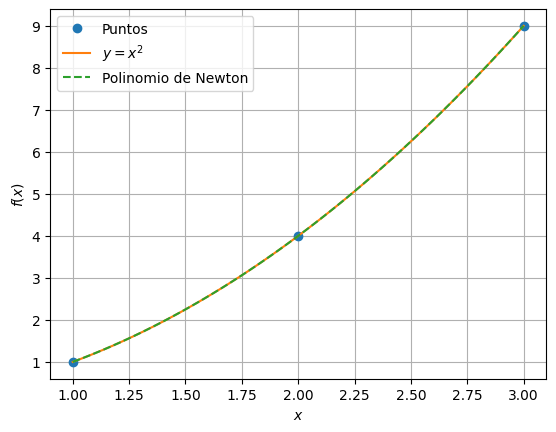

In [22]:
from scipy.interpolate import BarycentricInterpolator # Newton
x_points = np.array([1, 2, 3])
y_points = np.array([1, 4, 9])  # f(x) = x^2

f = lambda x: x**2 # Función
P = BarycentricInterpolator(x_points, y_points) # Polinomio interpolador

x_interp = np.linspace(min(x_points), max(x_points), 100)
y_interp = P(x_interp)
plt.plot(x_points, y_points, 'o', label = 'Puntos')
plt.plot(x_interp, f(x_interp), label = '$y=x^2$')
plt.plot(x_interp, y_interp, '--', label = 'Polinomio de Newton')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid()
plt.show()

> **Actividad**

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía, calcule los polinomios de Lagrange y Newton, luego a partir de la diferencia $|f(x) - P(x)|$ calcule el error asociado a cada uno de ellos.


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
```



# Polinomio de Newton: Forma Progresiva y Regresiva

La interpolación de Newton se puede expresar en dos formas principales: la **progresiva** y la **regresiva**. Ambas utilizan diferencias divididas, pero se aplican de forma diferente dependiendo del orden de los puntos de interpolación.

## 1. Polinomio Progresivo de Newton

El **polinomio progresivo de Newton** se construye utilizando diferencias divididas y un conjunto de puntos que comienza en el primer valor del conjunto de datos. Se utiliza cuando los puntos de interpolación están ordenados de forma creciente.

La forma general del polinomio progresivo es:

$$
P(x) = f[x_0] + f[x_0, x_1](x - x_0) + f[x_0, x_1, x_2](x - x_0)(x - x_1) + \dots + f[x_0, x_1, \dots, x_n](x - x_0)(x - x_1)\dots(x - x_{n-1})
$$

Donde:
- $f[x_0]$ es el valor de la función en $x_0$.
- $f[x_0, x_1], f[x_0, x_1, x_2], \dots$ son las diferencias divididas calculadas en el conjunto de puntos $(x_0, x_1, \dots, x_n)$.
- $(x - x_0)(x - x_1)\dots(x - x_{n-1})$ son los factores multiplicativos correspondientes.

#### Ecuación General:

El polinomio progresivo de Newton puede escribirse como:

$$
P(x) = \sum_{i=0}^{n} f[x_0, x_1, \dots, x_i] \prod_{j=0}^{i-1} (x - x_j)
$$

Este polinomio es adecuado cuando los puntos de interpolación están ordenados de manera que comienzan en el primer punto y avanzan en una secuencia creciente.

## 2. Polinomio Regresivo de Newton

El **polinomio regresivo de Newton** se construye de manera similar al progresivo, pero comienza en el último punto del conjunto de datos y retrocede hacia los primeros puntos. Se utiliza cuando los puntos de interpolación están ordenados de forma decreciente o cuando se quiere que el polinomio esté centrado en el último punto.

La forma general del polinomio regresivo es:

$$
P(x) = f[x_n] + f[x_n, x_{n-1}](x - x_n) + f[x_n, x_{n-1}, x_{n-2}](x - x_n)(x - x_{n-1}) + \dots + f[x_n, x_{n-1}, \dots, x_0](x - x_n)(x - x_{n-1}) \dots (x - x_1)
$$

#### Ecuación General:

El polinomio regresivo de Newton puede escribirse como:

$$
P(x) = \sum_{i=0}^{n} f[x_n, x_{n-1}, \dots, x_{n-i}] \prod_{j=0}^{i-1} (x - x_{n-j})
$$

Este polinomio se utiliza cuando los puntos de interpolación están ordenados en secuencia descendente o cuando es preferible centrarse en el último punto de la secuencia de datos.


### Ventajas y Desventajas

- **Polinomio Progresivo**: Es conveniente cuando los puntos de interpolación están ordenados de manera creciente. Además, es fácil de actualizar si se añaden más puntos.
- **Polinomio Regresivo**: Es útil cuando los puntos están ordenados de manera decreciente o cuando se quiere centrar el polinomio en el último punto.

Ambos métodos permiten calcular un polinomio interpolante, pero el método progresivo es generalmente más común en aplicaciones prácticas debido a la simplicidad en su construcción.


> **Actividad:**
Genera una función que realice el polinomio regresivo de Newton, compara con el progresivo para la función $\cos(x)$ usando 3 puntos.

# Interpolación de Hermite

La interpolación de Hermite es una técnica que se utiliza cuando, además de los valores de la función, también se conocen las derivadas en algunos puntos. Esta técnica busca construir un polinomio que no solo pase por los puntos dados, sino que también ajuste las pendientes (derivadas) en esos puntos, lo que proporciona una aproximación más precisa que la interpolación de Lagrange, en casos donde la suavidad es importante.

## Polinomio de Hermite

Para un conjunto de puntos $x_0, x_1, \dots, x_n$, con valores $f(x_0), f(x_1), \dots, f(x_n)$ y derivadas $f'(x_0), f'(x_1), \dots, f'(x_n)$, el polinomio de Hermite $H(x)$ está dado por:

$$
H(x) = \sum_{i=0}^{n} \left( h_i^2(x)(1 - 2(x - x_i)h_i'(x_i))f(x_i) + h_i^2(x)(x - x_i)f'(x_i) \right)
$$

donde:

- $h_i(x)$ es la base de Lagrange definida como:

$$h_i(x) = \prod_{\substack{j=0 \\ j \neq i}}^n \frac{x - x_j}{x_i - x_j}$$

- $h_i'(x_i)$ es la derivada de $h_i(x)$ evaluada en el punto $x_i$.

El polinomio de Hermite ajusta tanto los valores de la función como las derivadas en los puntos dados, garantizando que el polinomio no solo pase por los puntos de control, sino que también tenga la misma pendiente en esos puntos.

### Propiedades

1. **Suavidad**: El polinomio de Hermite es suave en la medida en que ajusta las derivadas en los puntos de interpolación, logrando una mejor representación de funciones suaves que la interpolación de Lagrange.
2. **Condiciones de interpolación**: El polinomio no solo interpola los valores de la función en los puntos dados, sino que también interpola las derivadas en esos puntos.
3. **Aplicaciones**: Se usa comúnmente en gráficos por computadora y problemas de aproximación cuando se conocen tanto los valores como las derivadas de las funciones.


## Ejemplo

Queremos construir el polinomio de Hermite para los siguientes puntos y sus derivadas:

- $f(x_0) = 1$, $f'(x_0) = 1$ en $x_0 = 0$
- $f(x_1) = 2.7183$, $f'(x_1) = 2.7183$ en $x_1 = 1$

### Paso 1: Funciones base de Lagrange

Primero, definimos las funciones base de Lagrange $h_0(x)$ y $h_1(x)$ para los puntos $x_0 = 0$ y $x_1 = 1$:

$$
h_0(x) = \frac{x - x_1}{x_0 - x_1} = \frac{x - 1}{0 - 1} = 1 - x
$$

$$
h_1(x) = \frac{x - x_0}{x_1 - x_0} = \frac{x - 0}{1 - 0} = x
$$

Las derivadas de estas funciones base son:

$$
h_0'(x_0) = \frac{d}{dx}(1 - x) = -1
$$

$$
h_1'(x_1) = \frac{d}{dx}(x) = 1
$$

### Paso 2: Construcción del Polinomio de Hermite

El polinomio de Hermite se construye combinando tanto los valores de la función como las derivadas en los puntos dados. La fórmula para el polinomio de Hermite es:

$$
H(x) = \sum_{i=0}^{1} \left( h_i^2(x)(1 - 2(x - x_i)h_i'(x_i))f(x_i) + h_i^2(x)(x - x_i)f'(x_i) \right)
$$

* Términos para $x_0 = 0$

Para $i = 0$, tenemos:

$$
h_0(x) = 1 - x, \quad h_0'(x_0) = -1
$$

$$
f(x_0) = 1, \quad f'(x_0) = 1
$$

El término correspondiente al punto $x_0 = 0$ es:

$$
h_0^2(x) = (1 - x)^2
$$

$$
(1 - 2(x - x_0)h_0'(x_0)) = 1 - 2(x - 0)(-1) = 1 + 2x
$$

El primer término del polinomio es:

$$
(1 + 2x)(1 - x)^2(1) + (x - 0)(1 - x)^2(1)
$$

Simplificando:

$$
3x^3-5x^2+x+1
$$


* Términos para $x_1 = 1$

Para $i = 1$, tenemos:

$$
h_1(x) = x, \quad h_1'(x_1) = 1
$$

$$
f(x_1) = 2.7183, \quad f'(x_1) = 2.7183
$$

El término correspondiente al punto $x_1 = 1$ es:

$$
h_1^2(x) = x^2
$$

$$
(1 - 2(x - x_1)h_1'(x_1)) = 1 - 2(x - 1)(1) = 3 - 2x
$$

El segundo término del polinomio es:

$$
x^2(x - 1)(2.7183)
$$

Simplificando:

$$
(2.7183)(-x^3+2x^2)
$$



## Paso 3: Polinomio Completo

Finalmente, sumamos los términos correspondientes a $x_0 = 0$ y $x_1 = 1$ para obtener el polinomio completo de Hermite:

$$
H(x) = (3x^3-5x^2+x+1) + 2.7183(-x^3+2x^2)
$$

Simplificamos el polinomio:

$$
H(x) = 0.2817x^3+0.4366x^2+x+1
$$

Este es el polinomio de Hermite que interpola los valores y derivadas en los puntos $x_0 = 0$ y $x_1 = 1$.


In [23]:
def hermite_interpolation(x_points, y_points, derivatives):
    """
    Interpolación de Hermite usando la fórmula correcta de Hermite.

    Args:
        x_points (list): Lista de puntos x donde se evalúa la función.
        y_points (list): Lista de valores f(x) en los puntos x.
        derivatives (list): Lista de derivadas f'(x) en los puntos x.

    Returns:
        sympy expression: El polinomio de Hermite.
    """
    x = sym.symbols('x')  # Variable simbólica
    n = len(x_points)      # Número de puntos de interpolación
    H = 0                   # Inicializar el polinomio de Hermite

    for i in range(n):
        # Polinomio de Lagrange h_i(x)
        h_i = 1
        for j in range(n):
            if j != i:
                h_i *= (x - x_points[j]) / (x_points[i] - x_points[j])

        # Derivada de L_i(x) evaluada en x_i
        h_i_prime = sym.diff(h_i, x).subs(x, x_points[i])

        # Términos del polinomio de Hermite
        term1 = (h_i**2) * (1 - 2 * (x - x_points[i]) * h_i_prime) * y_points[i]
        term2 = (h_i**2) * (x - x_points[i]) * derivatives[i]

        # Sumar el término al polinomio total
        H += term1 + term2

    return sym.simplify(H)


In [24]:
x_points = [0, 1, 2]  # Puntos donde se evalúa la función
y_points = np.exp(x_points) # Valores de la función en los puntos
derivatives = np.exp(x_points)  # Derivadas de la función en los puntos

hermite_poly = hermite_interpolation(x_points, y_points, derivatives)
hermite_function = sym.lambdify(sym.symbols('x'), hermite_poly, 'numpy')
hermite_poly

                    5                        4                      3                      2       ↪
0.0237537789937203⋅x  + 0.00224890875778172⋅x  + 0.205959017044233⋅x  + 0.486320123663313⋅x  + 1.0 ↪

↪         
↪ ⋅x + 1.0

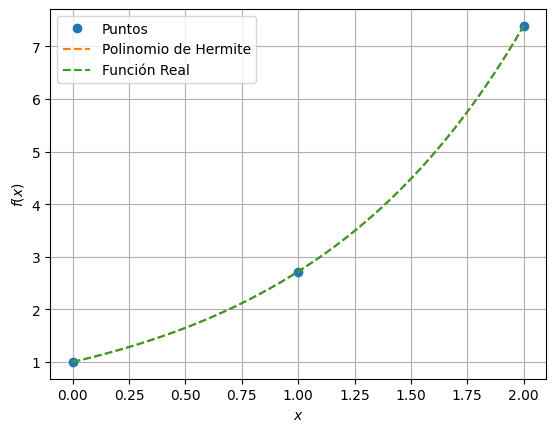

In [25]:
x_interp = np.linspace(min(x_points), max(x_points), 100)
y_interp = hermite_function(x_interp)
plt.plot(x_points, y_points, 'o', label='Puntos')
plt.plot(x_interp, y_interp, '--', label='Polinomio de Hermite')
plt.plot(x_interp, np.exp(x_interp), '--', label='Función Real')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid()
plt.show()


> Actividad

Encuentre que el polinomio de Hermite para H(1.5) = 0.5118277

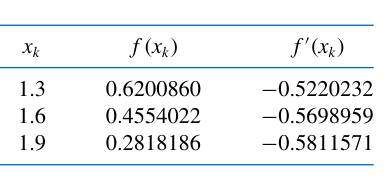

In [26]:
# Datos de los puntos y sus derivadas
x_points = np.array([1.3, 1.6, 1.9])
y_points = np.array([0.6200860, 0.4554022, 0.2818186])
derivatives = np.array([-0.5220232, -0.5698959, -0.5811571])

# Crear el polinomio de Hermite
H = hermite_interpolation(x_points, y_points, derivatives)
hermite_function = sym.lambdify(sym.symbols('x'), H, 'numpy')
hermite_function(1.5)

0.5118277017280187

## Método polinomio de Hermite

Desde `scipy.interpolate` podemos usar `CubicHermiteSpline`


```python
from scipy.interpolate import CubicHermiteSpline
```



In [27]:
from scipy.interpolate import CubicHermiteSpline
x_points = np.array([1.3, 1.6, 1.9])
y_points = np.array([0.6200860, 0.4554022, 0.2818186])
derivatives = np.array([-0.5220232, -0.5698959, -0.5811571])

hermite_poly = CubicHermiteSpline(x_points, y_points, derivatives)
hermite_poly(1.5)

array(0.51182619)

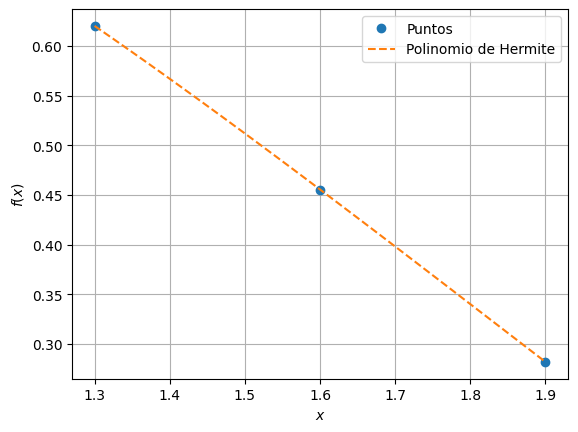

In [28]:
x_interp = np.linspace(min(x_points), max(x_points), 100)
y_interp = hermite_poly(x_interp)
plt.plot(x_points, y_points, 'o', label='Puntos')
plt.plot(x_interp, y_interp, '--', label='Polinomio de Hermite')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid()
plt.show()